In [1]:
# Import core libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For plotting and visualization
import seaborn as sns # For statistical data visualization

# Plot configuration 
plt.style.use('ggplot')
sns.set()

# Display plots inside the notebook 
%matplotlib inline

print("Libraries successfully loaded.")

# Load dataset 
df = pd.read_csv('kc_house_data.csv')

#  Display the first few rows of the dataset
df.head()

Libraries successfully loaded.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# View general information about the dataset 
df.info() # Shows column names, data types, and non-null counts

# Display the first few rows again
df.head()

# Display dataset dimensions 
print("Filas:", df.shape[0], " Columnas:", df.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
#  Check for missing values in each column 
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# Count duplicated records
df.duplicated().sum()

# Drop duplicates if any exist
df = df.drop_duplicates()
print("Duplicates removed (if any were found)")


Duplicates removed (if any were found)


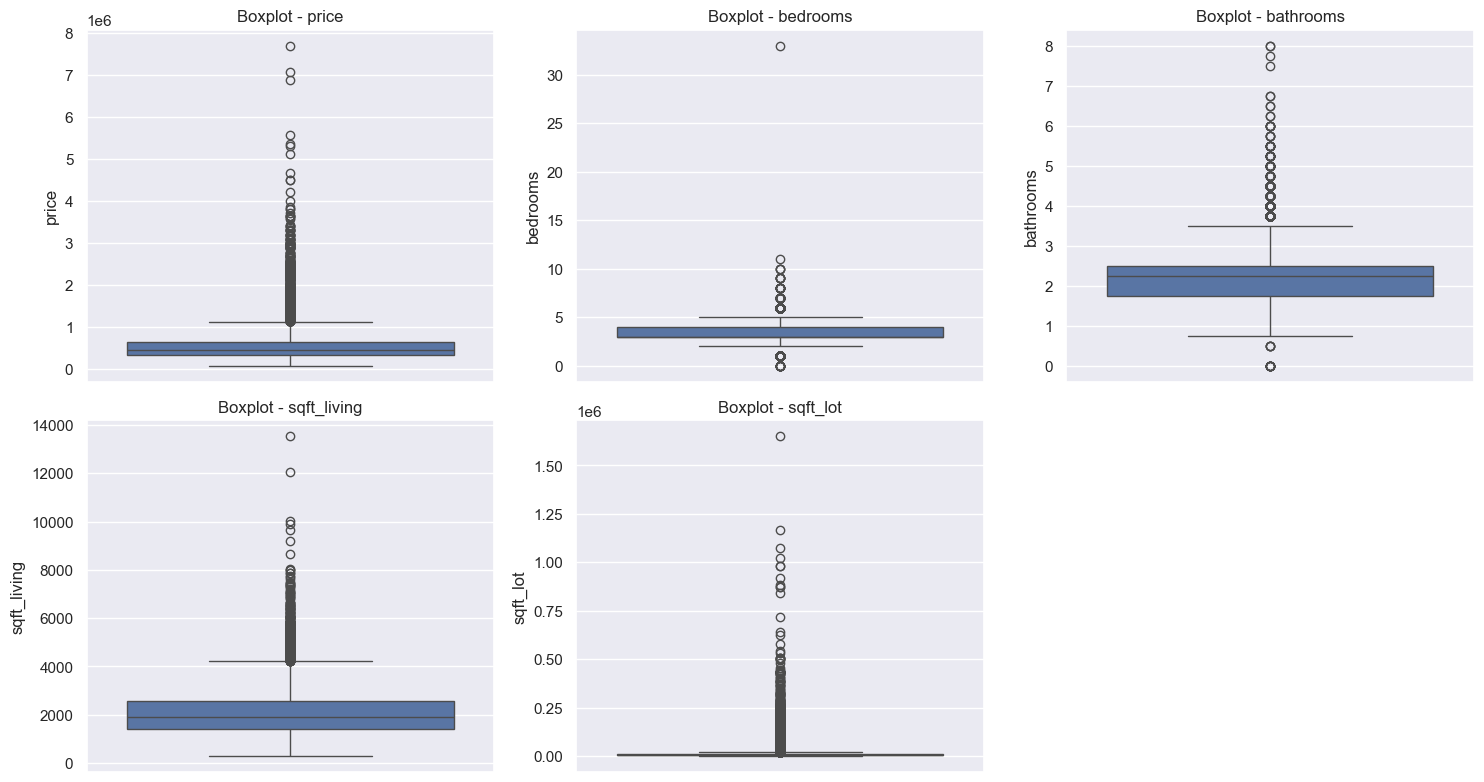

In [5]:
# Select key numerical variables for analysis
num_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Plot boxplots to identify outliers and distribution
plt.figure(figsize=(15, 8))
for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot - {var}')
plt.tight_layout()
plt.show()


In [6]:
# Generate summary statistics for numerical features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


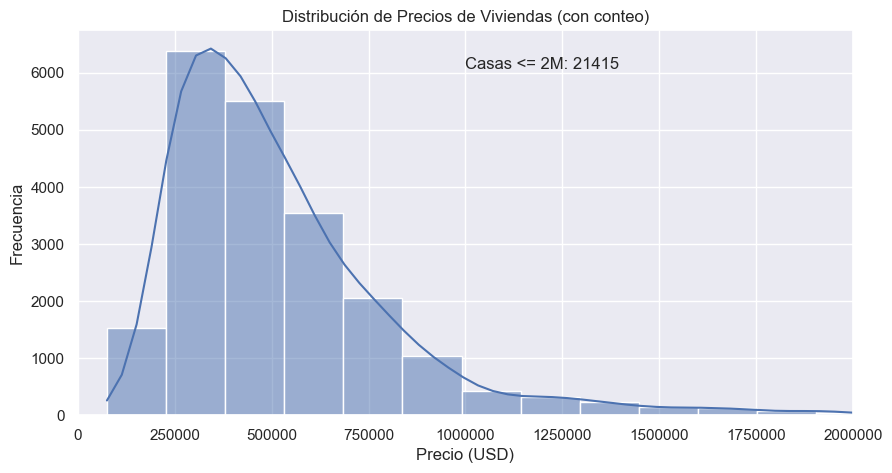

In [7]:
# Plot 1: Distribution of house prices (limited X-axis) 

plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0, 2000000)
plt.title('House Price Distribution (with Count)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

# Annotate the number of houses priced under $2M
count = df[df['price'] <= 2000000].shape[0]
plt.text(1000000, plt.ylim()[1]*0.9, f"Casas <= 2M: {count}", fontsize=12)

plt.show()



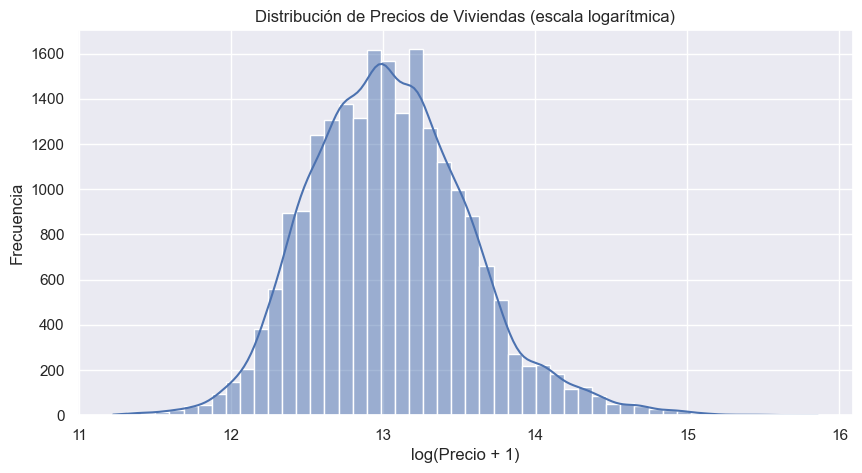

In [8]:
# Plot 2: Distribution of house prices (logarithmic scale)

plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title('House Price Distribution (Logarithmic Scale)')
plt.xlabel('log(Price + 1)')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Create a copy of the original DataFrame to preserve the raw data
df_model = df.copy()

# Drop irrelevant or non-informative columns for modeling
df_model.drop(columns=['id', 'date', 'lat', 'long'], inplace=True)

# Preview the updated DataFrame
df_model.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [10]:
# Apply one-hot encoding to the 'zipcode' categorical variable
df_model = pd.get_dummies(df_model, columns=['zipcode'], drop_first=True)


In [11]:
# Define target variable
y = df_model['price']

# Define predictor variables
X = df_model.drop(columns=['price'])


In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
# Display the shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (17290, 84)
X_test shape : (4323, 84)
y_train shape: (17290,)
y_test shape : (4323,)


In [14]:
from sklearn.preprocessing import StandardScaler

# === Standardize the predictor variables ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit on training data and transform
X_test_scaled = scaler.transform(X_test) # Transform test data using the same scaler


In [15]:
# Check shapes (should match original X_train and X_test)
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape :", X_test_scaled.shape)

# Check mean and standard deviation of the scaled training data
print(""Mean of X_train_scaled:", np.mean(X_train_scaled))
print("Standard deviation of X_train_scaled:", np.std(X_train_scaled))


X_train_scaled shape: (17290, 84)
X_test_scaled shape : (4323, 84)
Media de X_train_scaled: -9.728402256045053e-18
Desviación estándar de X_train_scaled: 1.0


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate model performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Display evaluation metric
print("Linear Regression Performance:")
print(f"MAE:  {mae_lr:,.2f}")
print(f"RMSE: {rmse_lr:,.2f}")
print(f"R²:   {r2_lr:.4f}")


Regresión Lineal:
MAE:  98,792.26
RMSE: 171,011.57
R²:   0.8066


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Note: no scaling needed for tree-based models

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"MAE:  {mae_rf:,.2f}")
print(f"RMSE: {rmse_rf:,.2f}")
print(f"R²:   {r2_rf:.4f}")



Random Forest:
MAE:  89,949.01
RMSE: 178,363.19
R²:   0.7896


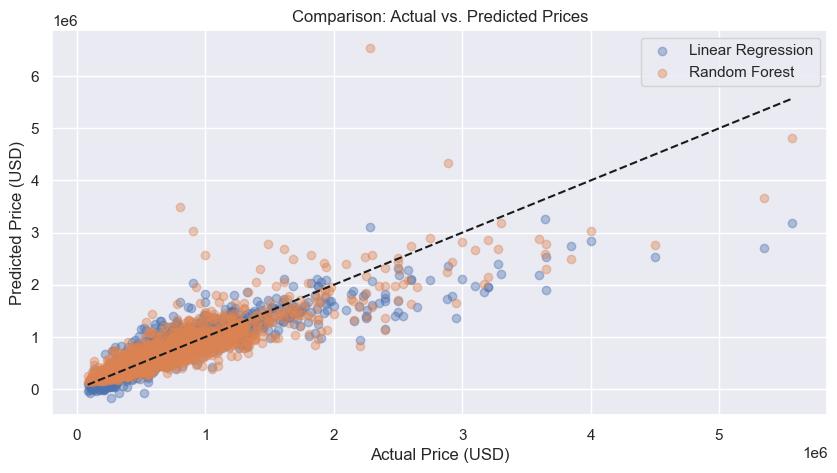

In [18]:
# === Plot: Actual vs. Predicted Prices for both models
plt.figure(figsize=(10,5))

# Scatter plot for Linear Regression predictions
plt.scatter(y_test, y_pred_lr, alpha=0.4, label='Linear Regression')

# Scatter plot for Random Forest predictions
plt.scatter(y_test, y_pred_rf, alpha=0.4, label='Random Forest')

# Diagonal reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

# Labels and title
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Comparison: Actual vs. Predicted Prices')
plt.legend()
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Display cross-validation result
print("R² score per fold:", cv_scores)
print("Average R² score:", np.mean(cv_scores))


R² en cada fold: [0.82736251 0.83335872 0.83739538 0.81664589 0.82300218]
R² promedio: 0.8275529365428907


In [20]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 5]
}

# Set up the GridSearch with 3-fold cross-validation
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

# Train the model using the hyperparameter grid
grid_rf.fit(X_train, y_train)

print("Best parameters found:", grid_rf.best_params_)
print("Best cross-validated R² score:", grid_rf.best_score_)


Mejores parámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
Mejor R² en validación: 0.8350403609078687


In [21]:
# Train the final Random Forest model using the best hyperparameters
best_rf = RandomForestRegressor(
    n_estimators=grid_rf.best_params_['n_estimators'],
    max_depth=grid_rf.best_params_['max_depth'],
    min_samples_leaf=grid_rf.best_params_['min_samples_leaf'],
    random_state=42
)

best_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [22]:
# Evaluate the tuned Random Forest model on the test set
y_pred_best = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Tuned Random Forest Performance:")
print(f"MAE:  {mae_best:,.2f}")
print(f"RMSE: {rmse_best:,.2f}")
print(f"R²:   {r2_best:.4f}")


Random Forest Ajustado (Tuned):
MAE:  89,629.09
RMSE: 176,227.90
R²:   0.7946


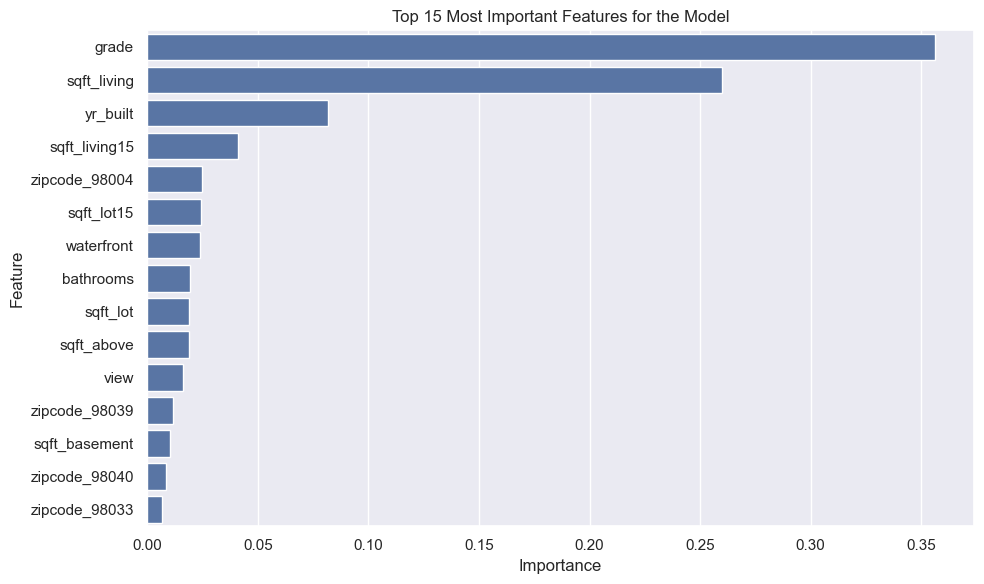

In [23]:
# Feature importance from the tuned Random Forest model
importances = best_rf.feature_importances_
features = X.columns

# Create a sorted DataFrame of the top 15 most important features
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(15)

# Plot the top 15 feature importances
plt.figure(figsize=(10,6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title('Top 15 Most Important Features for the Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [24]:
import joblib

# Save the tuned Random Forest model to a .pkl file
joblib.dump(best_rf, 'modelo_random_forest_tuned.pkl')

print("Model saved as modelo_random_forest_tuned.pkl")


Model saved as modelo_random_forest_tuned.pkl
